### Guided Practice: Logit Function and Odds

In [3]:
import pandas as pd
import numpy as np

In [4]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [6]:
for odds in odds_set:
    print (sigmoid_func(logit_func(odds)))

0.833333333333
0.952380952381
0.52380952381
0.642857142857
0.615384615385


In [7]:
import pandas as pd

# Statsmodels logistic regression is sm.Logit
import statsmodels.api as sm

/Users/judenwosu/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
# Read in the data

df = pd.read_csv('../dataset/collegeadmissions.csv')

In [9]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [10]:
df = df.join(pd.get_dummies(df['rank']))

In [11]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [13]:
# using statsmodels
X = df[['gre', 'gpa', 1, 2, 3,]]
X = sm.add_constant(X)
y = df['admit']
lm = sm.Logit(y, X)
result = lm.fit()
print (df.admit.mean())
result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
0.3175


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 03 Jan 2018   Pseudo R-squ.:                 0.08292
Time:                        11:31:51   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5414      1.138     -4.869      0.000      -7.772      -3.311
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
1              1.5515      0.418      3.713      0.000       0.733       2.370
2              0.8760      0.367      2.389      0.017       0.157       1.595
3              0.2113      0.393      0.538      0.591      -0.559       0.981
==============================================================================
"""

In [14]:
# using sklearn - why is there a difference in the coefficients?
from sklearn.linear_model import LogisticRegression
lm_2 = LogisticRegression()
lm_2.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])
print (df.admit.mean())
print (lm_2.coef_)
print (lm_2.intercept_)

0.3175
[[  1.63913356e-03   4.33354115e-04   1.15220976e+00   5.14395667e-01
   -3.62326171e-02]]
[-2.09315183]


In [16]:
# You can easily convert these into odds using numpy.exp(). The difference is because sklearn regularizes.
# Try setting C to a very large number (1e12) and repeat the analysis
print (np.exp(result.params))  # for statsmodels
print (np.exp(np.concatenate((lm_2.intercept_, lm_2.coef_[0]))))  # for sklearn

const    0.003921
gre      1.002267
gpa      2.234545
1        4.718371
2        2.401325
3        1.235233
dtype: float64
[ 0.12329791  1.00164048  1.00043345  3.16517946  1.67262737  0.96441593]


The above makes it more clear that a schools rank as it approaches 4 decreases the odds of getting admitted.
The accuracy of the model with all features (removing one rank) is ~70%.

In [17]:
predicted = result.predict(X)
print (predicted)
threshold = 0.5
predicted_classes = (predicted > threshold).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_classes)

0      0.172627
1      0.292175
2      0.738408
3      0.178385
4      0.118354
5      0.369970
6      0.419246
7      0.217003
8      0.200735
9      0.517868
10     0.374314
11     0.400200
12     0.720539
13     0.353455
14     0.692380
15     0.185825
16     0.339939
17     0.078953
18     0.540228
19     0.573512
20     0.161221
21     0.437271
22     0.128375
23     0.192049
24     0.437594
25     0.682295
26     0.578481
27     0.204754
28     0.423073
29     0.458299
         ...   
370    0.398574
371    0.317087
372    0.376508
373    0.530854
374    0.411424
375    0.187357
376    0.415124
377    0.589590
378    0.202240
379    0.218961
380    0.463667
381    0.346029
382    0.349677
383    0.672759
384    0.186651
385    0.351893
386    0.528429
387    0.342879
388    0.339081
389    0.402750
390    0.400936
391    0.487194
392    0.222029
393    0.438725
394    0.253423
395    0.488670
396    0.165504
397    0.181062
398    0.463667
399    0.300731
Length: 400, dtype: floa

0.70999999999999996

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

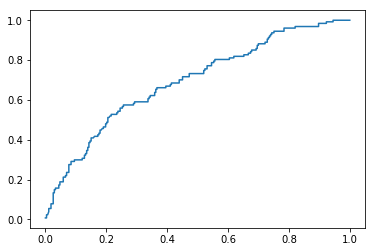

In [19]:
plt.plot(roc_curve(df[['admit']], predicted)[0], roc_curve(df[['admit']], predicted)[1])

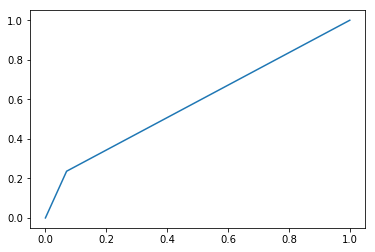

In [20]:
plt.plot(roc_curve(df[['admit']], predicted_classes)[0], roc_curve(df[['admit']], predicted_classes)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [21]:
roc_auc_score(df['admit'], predicted_classes)

0.58331170142193767

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

### Notes

Note this is just one approach optimized for Area Under the Curve.

Age will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

In [22]:
titanic = pd.read_csv('../dataset/titanic.csv')

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic.set_index('PassengerId', inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass))
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

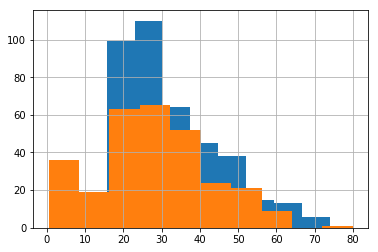

In [25]:
%matplotlib inline
titanic.groupby('Survived').Age.hist()

In [26]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,is_male
PassengerId,,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,1,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,0,1,0
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,0,0,1
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,0,1,1


In [27]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))  # imputing missing values
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [28]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression

feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, titanic.Survived)
gs.grid_scores_
#print gs.best_estimator_

/Users/judenwosu/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/judenwosu/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.83905, std: 0.02899, params: {'C': 100000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02900, params: {'C': 10000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02900, params: {'C': 1000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.83894, std: 0.02869, params: {'C': 100, 'class_weight': None},
 mean: 0.83910, std: 0.02936, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.83909, std: 0.02895, params: {'C': 10, 'class_weight': None},
 mean: 0.83906, std: 0.02946, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.84019, std: 0.02962, params: {'C': 1, 'class_weight': None},
 mean: 0.83890, std: 0.02989, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.83737, std: 0.03051, params: {'C': 0.1, 'class_weight': None},
 mean: 0.83560, std: 0

In [30]:
print (gs.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
